In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0


In [2]:
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/"
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces 
!unzip /content/140k-real-and-fake-faces.zip -d dataset 

Streaming output truncated to the last 5000 lines.
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: dataset/real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: dataset/real_vs_fake/real-

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory("/content/dataset/real_vs_fake/real-vs-fake/train")
test_dataset = tf.keras.utils.image_dataset_from_directory("/content/dataset/real_vs_fake/real-vs-fake/test")
valid_dataset = tf.keras.utils.image_dataset_from_directory("/content/dataset/real_vs_fake/real-vs-fake/valid")

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [4]:
# import pandas as pd

# # Load data from a CSV file into a DataFrame
# df = pd.read_csv("/content/dataset/train.csv")

# # Display the first few rows of the DataFrame
# print(df.head())

In [5]:
# df = df.drop(df.columns[0], axis=1)

In [6]:
# df = df.drop([ "id", "original_path", "label"], axis=1)

# # Display the modified DataFrame
# print(df)

In [7]:
# import pandas as pd

# # Load data from a CSV file into a DataFrame
# df1 = pd.read_csv("/content/dataset/test.csv")

# # Display the first few rows of the DataFrame
# print(df1.head())

In [8]:
# df1 = df1.drop(df1.columns[0], axis=1)

In [9]:
# df1 = df1.drop([ "id", "original_path", "label"], axis=1)

# # Display the modified DataFrame
# print(df1)

In [10]:
# import pandas as pd

# # Load data from a CSV file into a DataFrame
# df2 = pd.read_csv("/content/dataset/valid.csv")

# # Display the first few rows of the DataFrame
# print(df2.head())

In [11]:
# df2 = df2.drop(df2.columns[0], axis=1)

In [12]:
# df2 = df2.drop([ "id", "original_path", "label"], axis=1)

# # Display the modified DataFrame
# print(df2)

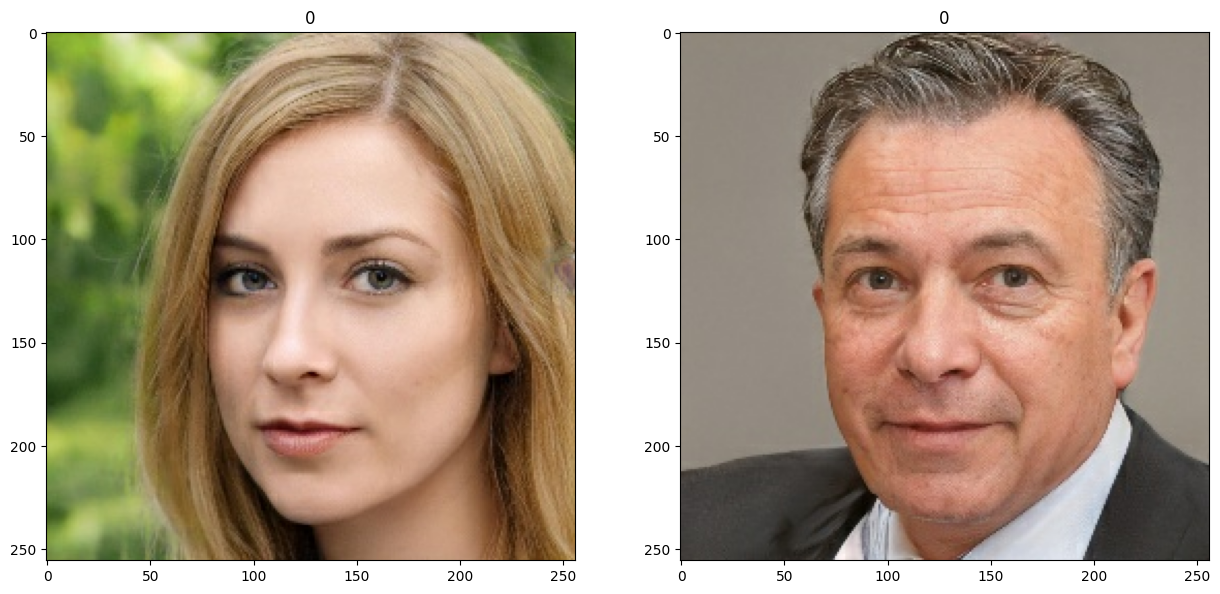

In [15]:
train_dataset_iterator = train_dataset.as_numpy_iterator()
batch = train_dataset_iterator.next()
fig, ax = plt.subplots(ncols=2, figsize=(15,15))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

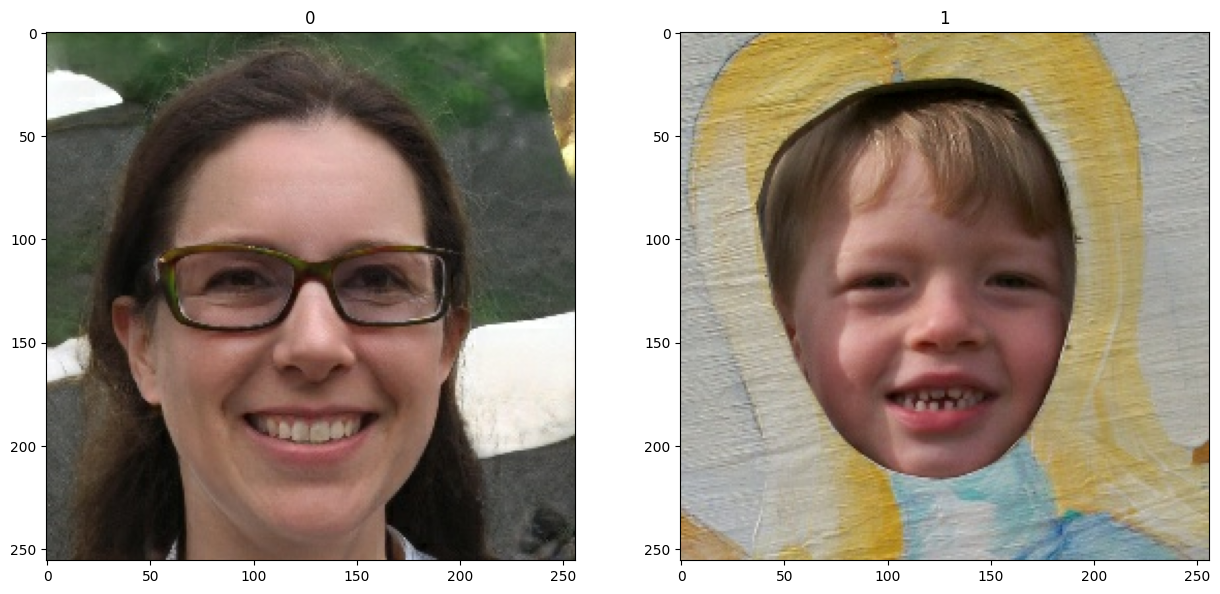

In [16]:
test_dataset_iterator = train_dataset.as_numpy_iterator()
batch = test_dataset_iterator.next()
fig, ax = plt.subplots(ncols=2, figsize=(15,15))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

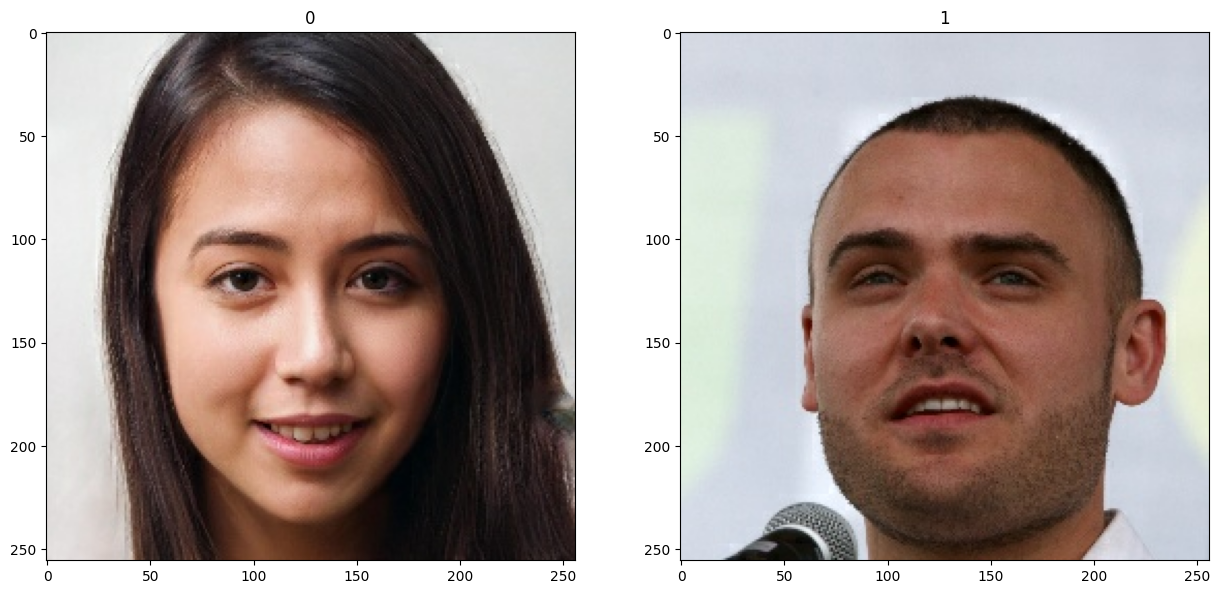

In [17]:
valid_dataset_iterator = train_dataset.as_numpy_iterator()
batch = valid_dataset_iterator.next()
fig, ax = plt.subplots(ncols=2, figsize=(15,15))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
    test_dataset = test_dataset.map(lambda x,y: (x/255, y))
test_dataset.as_numpy_iterator().next()

(array([[[[0.8745098 , 0.89411765, 0.90588236],
          [0.93333334, 0.9529412 , 0.9647059 ],
          [0.92941177, 0.9607843 , 0.96862745],
          ...,
          [0.89411765, 0.92941177, 0.9490196 ],
          [0.9137255 , 0.9411765 , 0.9647059 ],
          [0.8862745 , 0.9137255 , 0.9372549 ]],
 
         [[0.9098039 , 0.92941177, 0.9411765 ],
          [0.94509804, 0.9647059 , 0.9764706 ],
          [0.9254902 , 0.95686275, 0.9647059 ],
          ...,
          [0.9137255 , 0.94509804, 0.95686275],
          [0.9372549 , 0.96862745, 0.98039216],
          [0.9254902 , 0.95686275, 0.96862745]],
 
         [[0.92941177, 0.9490196 , 0.9607843 ],
          [0.9372549 , 0.95686275, 0.96862745],
          [0.9254902 , 0.94509804, 0.95686275],
          ...,
          [0.92156863, 0.9411765 , 0.9529412 ],
          [0.9372549 , 0.9607843 , 0.9607843 ],
          [0.92941177, 0.9529412 , 0.9529412 ]],
 
         ...,
 
         [[0.78039217, 0.8117647 , 0.9019608 ],
          [0.72941

In [19]:
train_dataset = train_dataset.map(lambda x,y: (x/255, y))
train_dataset.as_numpy_iterator().next()

(array([[[[0.5019608 , 0.49803922, 0.48235294],
          [0.49803922, 0.49411765, 0.47843137],
          [0.49411765, 0.49019608, 0.4745098 ],
          ...,
          [0.42352942, 0.41960785, 0.40392157],
          [0.43137255, 0.42745098, 0.4117647 ],
          [0.43137255, 0.42745098, 0.4117647 ]],
 
         [[0.49803922, 0.49411765, 0.47843137],
          [0.49411765, 0.49019608, 0.4745098 ],
          [0.49411765, 0.49019608, 0.4745098 ],
          ...,
          [0.41960785, 0.41568628, 0.4       ],
          [0.41568628, 0.4117647 , 0.39607844],
          [0.4117647 , 0.40784314, 0.39215687]],
 
         [[0.5058824 , 0.49019608, 0.47843137],
          [0.5019608 , 0.4862745 , 0.4745098 ],
          [0.49411765, 0.49019608, 0.4745098 ],
          ...,
          [0.41960785, 0.41568628, 0.4       ],
          [0.4117647 , 0.40784314, 0.39215687],
          [0.40392157, 0.4       , 0.38431373]],
 
         ...,
 
         [[0.24313726, 0.25490198, 0.28235295],
          [0.18823

In [20]:
valid_dataset = valid_dataset.map(lambda x,y: (x/255, y))
valid_dataset.as_numpy_iterator().next()

(array([[[[0.04313726, 0.03921569, 0.0627451 ],
          [0.        , 0.        , 0.01568628],
          [0.        , 0.01176471, 0.01960784],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.06666667, 0.06666667, 0.09803922],
          [0.        , 0.01176471, 0.03137255],
          [0.        , 0.00784314, 0.01568628],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.06666667, 0.09411765, 0.1254902 ],
          [0.        , 0.01960784, 0.05098039],
          [0.        , 0.00784314, 0.01960784],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.95686275, 0.78431374, 0.5372549 ],
          [0.95686

In [21]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [25]:
model.fit(train_dataset, epochs=2, validation_data= valid_dataset)

Epoch 1/2
3125/3125 [==============================] - 237s 72ms/step - loss: 0.3790 - accuracy: 0.8215 - val_loss: 0.2642 - val_accuracy: 0.8888
Epoch 2/2
3125/3125 [==============================] - 213s 68ms/step - loss: 0.1600 - accuracy: 0.9369 - val_loss: 0.1530 - val_accuracy: 0.9391


In [26]:
y_pred = model.predict(test_dataset)

625/625 [==============================] - 34s 54ms/step


(1, 256, 256, 3)

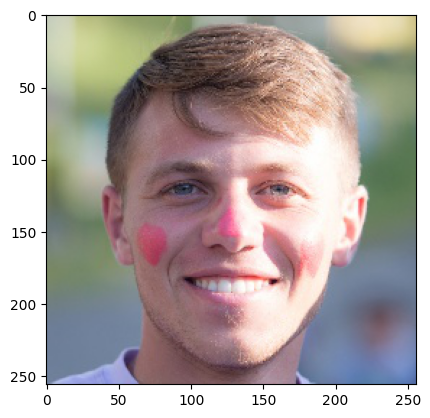

In [33]:
import PIL
from PIL import Image
im1 = Image.open('/content/dataset/real_vs_fake/real-vs-fake/test/fake/00056.jpg')
im2=im1.resize((256, 256))
p1 = np.array(im2)
p1=p1/255
plt.imshow(im1)
p1 = np.expand_dims(p1, axis=0)
p1.shape

In [34]:
Image_Test=np.argmax(model.predict(p1),axis=-1)
print(Image_Test)
if Image_Test== [0]:
    print('Fake Face :( ')
else:
    print("Real Face :) ")

1/1 [==============================] - 0s 27ms/step
[0]
Fake Face :( 
